In [1]:
import os
import glob
import numpy as np
import h5py
from osgeo import gdal
import osgeo.osr as osr
import matplotlib.pyplot as plt

In [65]:
dir = '/home/geodata/Raster/IMERG/Monthly_Global/'
outdir = '/home/geodata/Raster/IMERG/Monthly_Brazil/'
hdflist = sorted(glob.glob(dir+'*.HDF5'))
hdflist

['/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20000601-S000000-E235959.06.V07B.HDF5',
 '/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20000701-S000000-E235959.07.V07B.HDF5',
 '/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20000801-S000000-E235959.08.V07B.HDF5',
 '/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20000901-S000000-E235959.09.V07B.HDF5',
 '/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20001001-S000000-E235959.10.V07B.HDF5',
 '/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20001101-S000000-E235959.11.V07B.HDF5',
 '/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20001201-S000000-E235959.12.V07B.HDF5',
 '/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20010101-S000000-E235959.01.V07B.HDF5',
 '/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20010201-S000000-E235959.02.V07B.HDF5',
 '/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.

In [66]:
#this method will print all of the names of hdf internal files
print("defining methods")
def printname(name):
 print(name)
print("method definitions complete")
print("")


defining methods
method definitions complete



In [77]:
for i in hdflist:
    date = i.split('.')[4].split('-')[0]
    print(date)
    hdf_ds = gdal.Open(i, gdal.GA_ReadOnly)
    band_ds = gdal.Open(hdf_ds.GetSubDatasets()[4][0], gdal.GA_ReadOnly)
    band_array = band_ds.ReadAsArray()
    band_array[band_array<0] = 0 #f
    # plt.imshow(band_array)
    # plt.colorbar(cmap='RdBu')
    # plt.show(); plt.close()

    raster = gdal.GetDriverByName('GTiff').Create(f'{outdir}/tc{date}.tif',3600,1800,1,gdal.GDT_Int16)

    geotransform = ([-180,0.1,0,90,0,-0.1])
    raster.SetGeoTransform(geotransform)
    srs=osr.SpatialReference()
    srs.ImportFromEPSG(4326)
    raster.SetProjection(srs.ExportToWkt())
    raster.GetRasterBand(1).WriteArray(band_array.T[::-1])
    raster = None
    
    print('saved')

    os.system(f"gdal_translate -projwin -81.533404133 6.658986797 -33.888358209 -34.958986797 -of GTiff {outdir}/tc{date}.tif {outdir}/{date}.tif")
    print('clipped')
    os.system(f'rm {outdir}/tc{date}.tif')
    print(f'temporary {outdir}/tc{date}.tif deleted')
    

20000601
saved
Input file size is 3600, 1800
0...10...20...30...40...50...60...70...80...90...100 - done.
clipped
temporary /home/geodata/Raster/IMERG/Monthly_Brazil//tc20000601.tif deleted
20000701
saved
Input file size is 3600, 1800
0...10...20...30...40...50...60...70...80...90...100 - done.
clipped
temporary /home/geodata/Raster/IMERG/Monthly_Brazil//tc20000701.tif deleted
20000801
saved
Input file size is 3600, 1800
0...10...20...30...40...50...60...70...80...90...100 - done.
clipped
temporary /home/geodata/Raster/IMERG/Monthly_Brazil//tc20000801.tif deleted
20000901
saved
Input file size is 3600, 1800
0...10...20...30...40...50...60...70...80...90...100 - done.
clipped
temporary /home/geodata/Raster/IMERG/Monthly_Brazil//tc20000901.tif deleted
20001001
saved
Input file size is 3600, 1800
0...10...20...30...40...50...60...70...80...90...100 - done.
clipped
temporary /home/geodata/Raster/IMERG/Monthly_Brazil//tc20001001.tif deleted
20001101
saved
Input file size is 3600, 1800
0...1

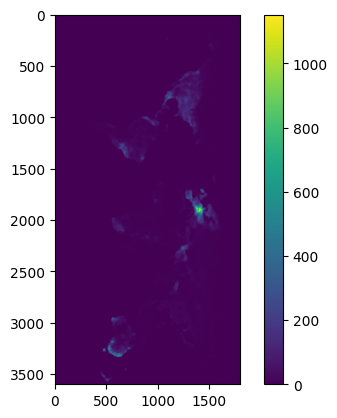

In [95]:
# 4 Grid/precipitation
# 6 Grid/probabilityLiquidPrecipitation


hdf_ds = gdal.Open(hdflist[10], gdal.GA_ReadOnly)
band_ds = gdal.Open(hdf_ds.GetSubDatasets()[4][0], gdal.GA_ReadOnly)
band_array = band_ds.ReadAsArray()
band_array[band_array<0] = 0 #f
plt.imshow(band_array) # ,vmin = 0,vmax=450
plt.colorbar(cmap='RdBu') 
plt.show(); plt.close()

(array([6.026053e+06, 1.658170e+05, 7.428200e+04, 4.723000e+04,
        3.374000e+04, 2.801600e+04, 2.374000e+04, 1.885500e+04,
        1.272100e+04, 9.069000e+03, 6.649000e+03, 5.019000e+03,
        3.740000e+03, 3.070000e+03, 2.678000e+03, 2.293000e+03,
        1.967000e+03, 1.712000e+03, 1.402000e+03, 1.183000e+03,
        9.350000e+02, 8.440000e+02, 7.420000e+02, 6.280000e+02,
        5.770000e+02, 5.170000e+02, 4.410000e+02, 3.820000e+02,
        3.440000e+02, 3.400000e+02, 2.890000e+02, 2.960000e+02,
        2.790000e+02, 2.390000e+02, 2.330000e+02, 2.300000e+02,
        2.060000e+02, 1.590000e+02, 1.630000e+02, 1.250000e+02,
        1.440000e+02, 1.510000e+02, 1.380000e+02, 1.440000e+02,
        1.130000e+02, 9.900000e+01, 1.030000e+02, 1.060000e+02,
        9.200000e+01, 1.050000e+02, 8.800000e+01, 1.030000e+02,
        8.700000e+01, 9.900000e+01, 9.600000e+01, 7.600000e+01,
        7.800000e+01, 7.800000e+01, 8.200000e+01, 6.900000e+01,
        6.800000e+01, 6.900000e+01, 5.70

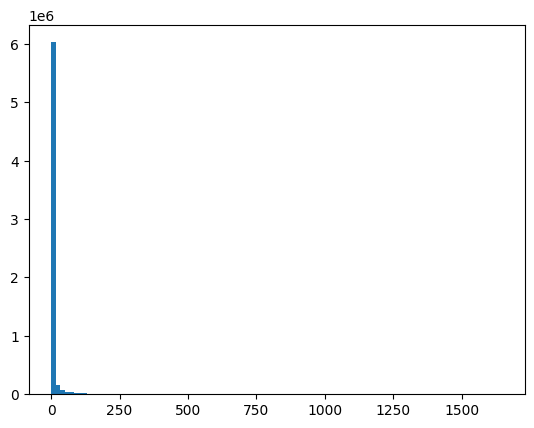

In [58]:
plt.hist(np.ravel(band_array), bins  = 100)

In [60]:

raster = gdal.GetDriverByName('GTiff').Create(singlehdflist[:-5]+".tif",3600,1800,1,gdal.GDT_Int16)

In [61]:
geotransform = ([-180,0.1,0,90,0,-0.1])
raster.SetGeoTransform(geotransform)

srs=osr.SpatialReference()
srs.ImportFromEPSG(4326)
raster.SetProjection(srs.ExportToWkt())
raster.GetRasterBand(1).WriteArray(band_array.T[::-1])

raster = None

In [40]:
'''
gdal_translate -projwin -81.533404133 6.658986797 -33.888358209 -34.958986797 
    -of GTiff /home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20000601-S000000-E235959.06.V07B.tif 
    /home/geodata/Raster/IMERG/Monthly_Brazil/2006-06-01.tif


'''

'/home/geodata/Raster/IMERG/Monthly_Global/3B-MO.MS.MRG.3IMERG.20000601-S000000-E235959.06.V07B.HDF5'